## Importing Libraries

In [85]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from kerastuner import HyperModel
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import warnings
warnings.filterwarnings("ignore")
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.applications import ResNet50
from keras import backend as K

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Keras for Image Classification

In [88]:
# Training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Student/project1/Data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 613 images belonging to 4 classes.


In [89]:
# Validation
valid_datagen = ImageDataGenerator(rescale=1./255)
val_data = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Student/project1/Data/valid',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 72 images belonging to 4 classes.


In [90]:
# Test
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Student/project1/Data/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 139 images belonging to 4 classes.


### Evaluation models using Accuracy, precision, reacll and F-measure

In [91]:
NUM_CLASSES = 4

## CNN Model

In [92]:

def build_model(hp):
    num_units_min  =  50
    num_units_max  =  500
    num_units_step =  50

    dropout_min  =  .1
    dropout_max  =  0.9
    dropout_step =  0.1
    model = Sequential()
        
    model.add(
        Conv2D(
            filters=hp.Int(
                'num_filters1',min_value=32, max_value=128, step=16 ),
            activation= 'relu', input_shape=(64,64,3),
            kernel_size=hp.Choice('kernel_size1', [3])))
    

    model.add(MaxPool2D(pool_size=hp.Choice('Pool_Size1', [2,3])))


    model.add(Flatten())
    model.add(layers.Dense(units=hp.Int('unit1',  min_value=num_units_min,
                                                 max_value=num_units_max,
                                                 step=num_units_step),activation = 'relu'))

    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam( hp.Float('learning_rate',min_value=1e-4,max_value=1e-2)),loss='categorical_crossentropy', metrics=['acc'] )
    return model



In [93]:
tuner = RandomSearch(
    build_model,
    objective='val_acc',
    max_trials=1,
    project_name='/content/drive/MyDrive/Student/project1/deepccn1')

In [94]:
epoch=20
BATCH_SIZE=32
early_stopping = EarlyStopping(monitor='val_acc', patience=30, verbose=1)
callback_list = [ early_stopping ]

# split training data into stratified train/dev sets

h=tuner.search(train_data, 
             epochs=epoch,
             batch_size=BATCH_SIZE, 
             callbacks=callback_list,  validation_data = val_data)
            
model = tuner.get_best_models(num_models=1)[0]

Trial 1 Complete [00h 01m 27s]
val_acc: 0.6388888955116272

Best val_acc So Far: 0.6388888955116272
Total elapsed time: 00h 01m 27s
INFO:tensorflow:Oracle triggered exit


In [95]:
best_cnn = tuner.get_best_models(num_models=1)[0]

In [96]:
tuner.get_best_hyperparameters()[0].values

{'Pool_Size1': 2,
 'kernel_size1': 3,
 'learning_rate': 0.009398395408163318,
 'num_filters1': 80,
 'unit1': 250}

In [97]:
best_cnn.save("/content/drive/MyDrive/Student/project1/model/DeepCNN.h5")

In [98]:
cnn=best_cnn.fit(train_data,
               
                  batch_size=BATCH_SIZE,
                  epochs=epoch, validation_data=(val_data))


Epoch 1/20
20/20 [==============================] - 5s 221ms/step - loss: 0.7972 - acc: 0.6607 - val_loss: 0.9231 - val_acc: 0.6528
Epoch 2/20
20/20 [==============================] - 4s 205ms/step - loss: 0.8225 - acc: 0.6183 - val_loss: 1.0194 - val_acc: 0.5972
Epoch 3/20
20/20 [==============================] - 4s 212ms/step - loss: 0.8530 - acc: 0.6166 - val_loss: 0.9531 - val_acc: 0.6111
Epoch 4/20
20/20 [==============================] - 4s 191ms/step - loss: 0.8339 - acc: 0.6297 - val_loss: 0.9300 - val_acc: 0.6389
Epoch 5/20
20/20 [==============================] - 4s 194ms/step - loss: 0.8214 - acc: 0.6248 - val_loss: 0.8891 - val_acc: 0.6528
Epoch 6/20
20/20 [==============================] - 4s 192ms/step - loss: 0.8035 - acc: 0.6476 - val_loss: 1.0698 - val_acc: 0.5972
Epoch 7/20
20/20 [==============================] - 4s 192ms/step - loss: 0.8240 - acc: 0.6281 - val_loss: 0.9386 - val_acc: 0.5972
Epoch 8/20
20/20 [==============================] - 4s 193ms/step - loss: 0.

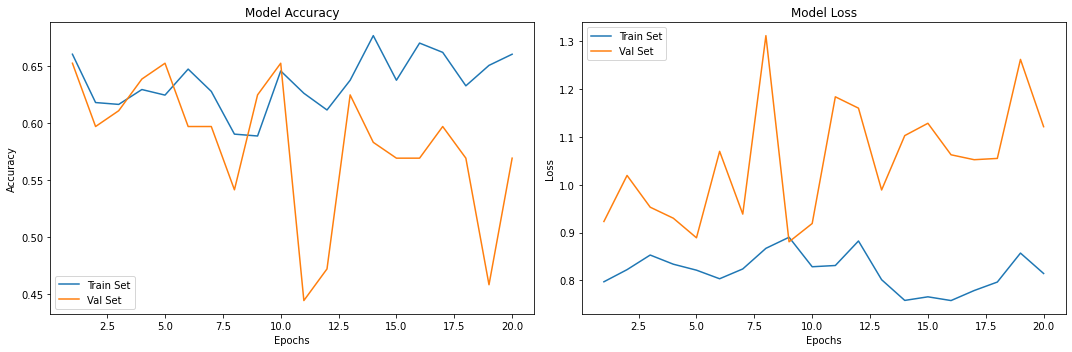

In [99]:
# Plot model performance
acc = cnn.history['acc']
val_acc = cnn.history['val_acc']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [100]:
# Checking the Accuracy of the Model 
secore = best_cnn.evaluate(test_data)
print(f"The accuracy of the model is = {secore[0]*100} %")


5/5 [==============================] - 1s 132ms/step - loss: 1.0486 - acc: 0.4604
The accuracy of the model is = 104.85730171203613 %


## VGG16 Model

In [101]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(64,64,3)
)

In [102]:
vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics= ['acc'] 
)

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 14,722,884
Trainable params: 8,196
Non-trainable params: 14,714,688
_________________________________________________________________


In [103]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data,  epochs = 20, 
    validation_data = val_data, batch_size=32)

Epoch 1/20
20/20 [==============================] - 5s 213ms/step - loss: 1.3605 - acc: 0.3589 - val_loss: 1.3431 - val_acc: 0.3194
Epoch 2/20
20/20 [==============================] - 4s 192ms/step - loss: 1.1901 - acc: 0.4731 - val_loss: 1.2504 - val_acc: 0.3472
Epoch 3/20
20/20 [==============================] - 4s 194ms/step - loss: 1.1513 - acc: 0.4992 - val_loss: 1.2116 - val_acc: 0.4306
Epoch 4/20
20/20 [==============================] - 4s 193ms/step - loss: 1.0840 - acc: 0.5188 - val_loss: 1.2459 - val_acc: 0.4167
Epoch 5/20
20/20 [==============================] - 4s 198ms/step - loss: 1.0537 - acc: 0.5416 - val_loss: 1.2457 - val_acc: 0.4583
Epoch 6/20
20/20 [==============================] - 4s 206ms/step - loss: 1.0288 - acc: 0.5351 - val_loss: 1.1393 - val_acc: 0.4306
Epoch 7/20
20/20 [==============================] - 4s 195ms/step - loss: 0.9984 - acc: 0.5514 - val_loss: 1.1784 - val_acc: 0.4306
Epoch 8/20
20/20 [==============================] - 4s 195ms/step - loss: 0.

In [104]:
vgg_model.save("/content/drive/MyDrive/Student/project1/model/vgg_model.h5")

In [105]:
# Checking the Accuracy of the Model 
secore_vgg = vgg_model.evaluate(test_data)

print(f"The accuracy of the model is = {secore_vgg [0]*100} %")


5/5 [==============================] - 1s 160ms/step - loss: 1.1875 - acc: 0.5036
The accuracy of the model is = 118.74923706054688 %


In [106]:
vgg.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

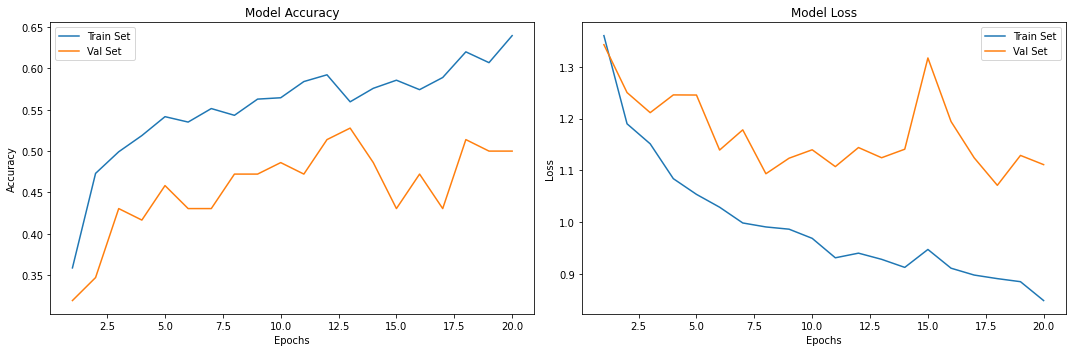

In [107]:
# Plot model performance
acc = vgg.history['acc']
val_acc = vgg.history['val_acc']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## RestNet50 Model

In [108]:
base_model = ResNet50(input_shape=(64,64,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

In [109]:
for layer in base_model.layers:
    layer.trainable = False

In [110]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(NUM_CLASSES, activation='softmax'))

In [111]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['acc'] )

In [112]:
# Fitting the Model
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 15, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size)

Epoch 1/15
19/19 [==============================] - 8s 280ms/step - loss: 1.6903 - acc: 0.2702 - val_loss: 1.6146 - val_acc: 0.1719
Epoch 2/15
19/19 [==============================] - 4s 200ms/step - loss: 1.5886 - acc: 0.2806 - val_loss: 1.5331 - val_acc: 0.2656
Epoch 3/15
19/19 [==============================] - 4s 200ms/step - loss: 1.5030 - acc: 0.3115 - val_loss: 1.4186 - val_acc: 0.3438
Epoch 4/15
19/19 [==============================] - 4s 203ms/step - loss: 1.4504 - acc: 0.3614 - val_loss: 1.4241 - val_acc: 0.2969
Epoch 5/15
19/19 [==============================] - 4s 200ms/step - loss: 1.4061 - acc: 0.3683 - val_loss: 1.4231 - val_acc: 0.2969
Epoch 6/15
19/19 [==============================] - 4s 202ms/step - loss: 1.3879 - acc: 0.3546 - val_loss: 1.4049 - val_acc: 0.3125
Epoch 7/15
19/19 [==============================] - 4s 200ms/step - loss: 1.3708 - acc: 0.3683 - val_loss: 1.4077 - val_acc: 0.3125
Epoch 8/15
19/19 [==============================] - 4s 222ms/step - loss: 1.

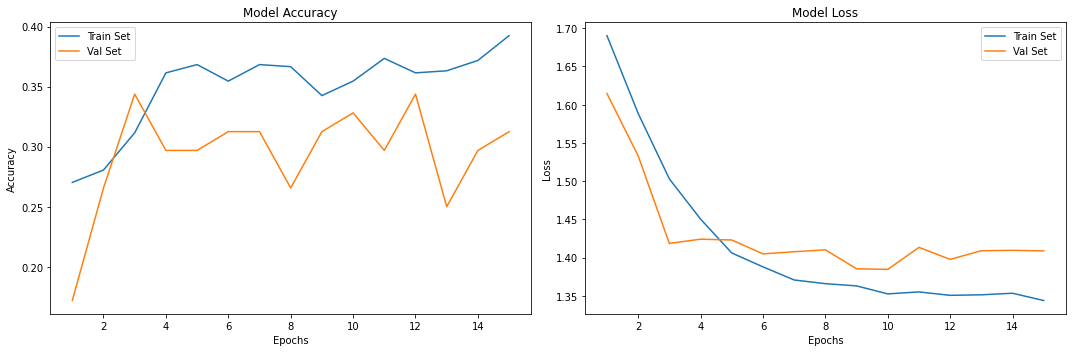

In [113]:
# Plot model performance
acc = resnet.history['acc']
val_acc = resnet.history['val_acc']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

In [114]:
# Checking the Accuracy of the Model 
secore_resnet = model_resnet.evaluate(test_data)

print(f"The accuracy of the model is = {secore_resnet [0]*100} %")


5/5 [==============================] - 1s 161ms/step - loss: 1.3631 - acc: 0.3957
The accuracy of the model is = 136.30794286727905 %
